```
uv pip install numpy uproot pandas matplotlib hist scipy ipykernel
```

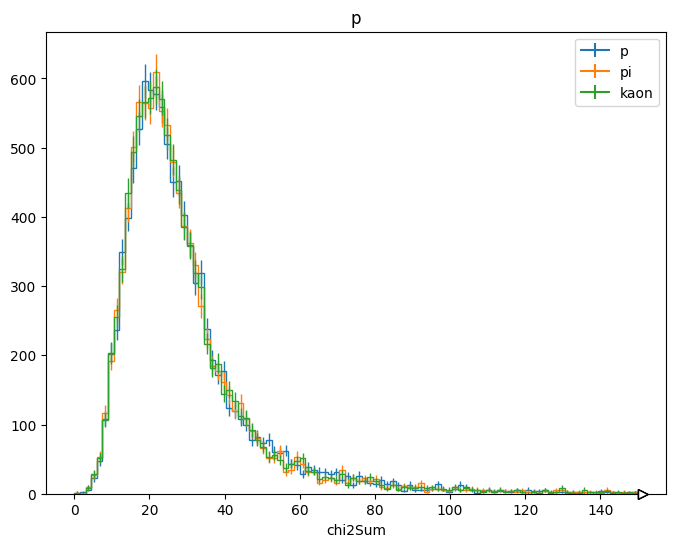

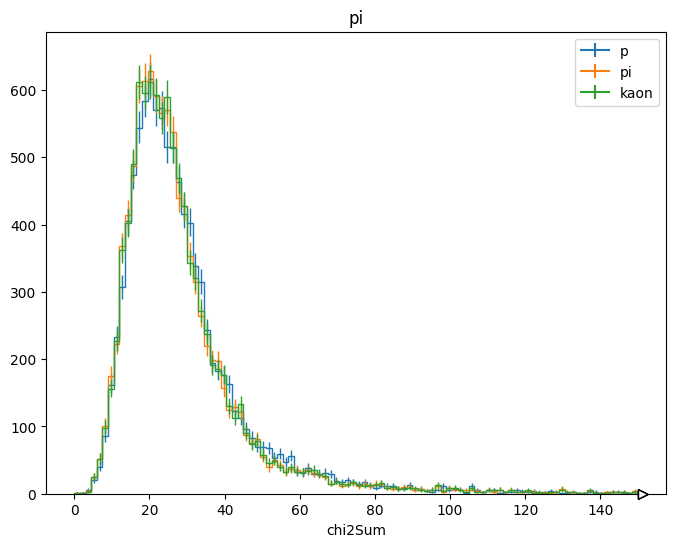

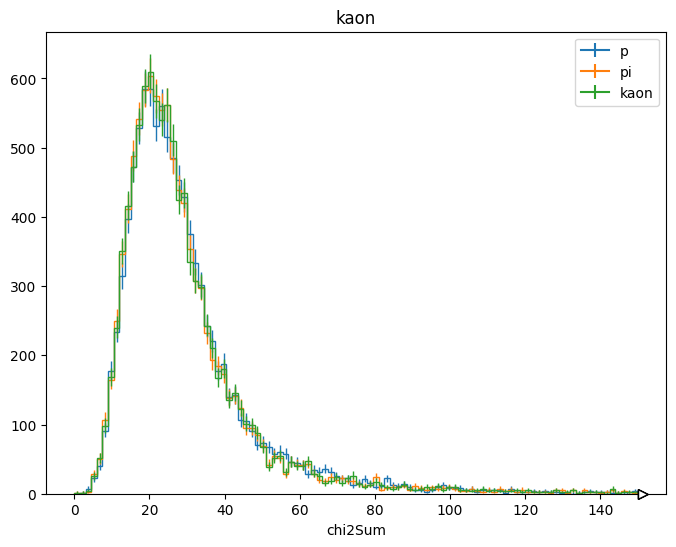

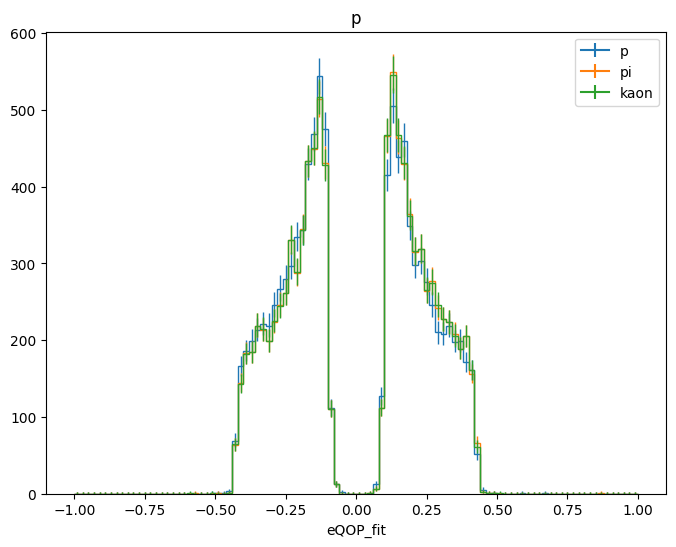

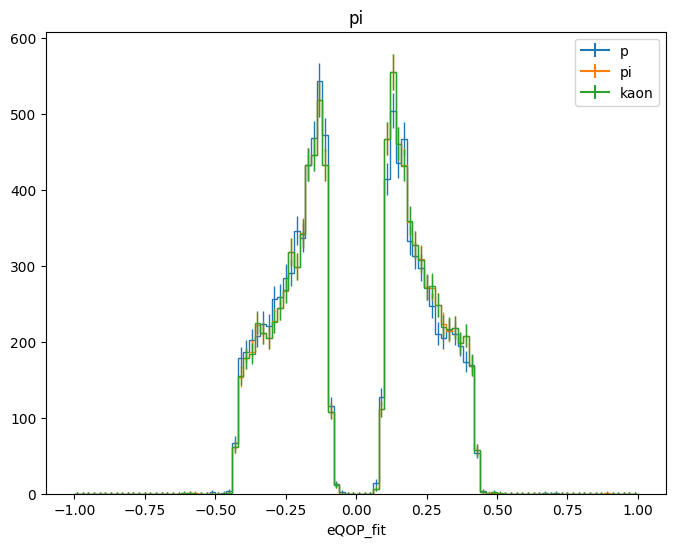

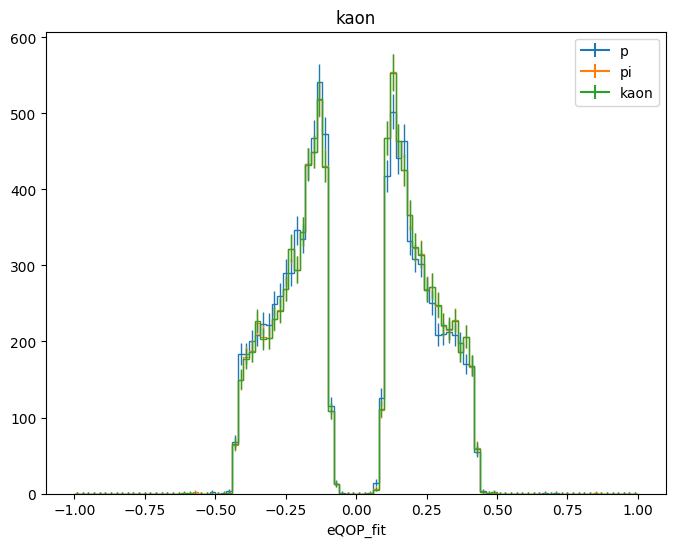

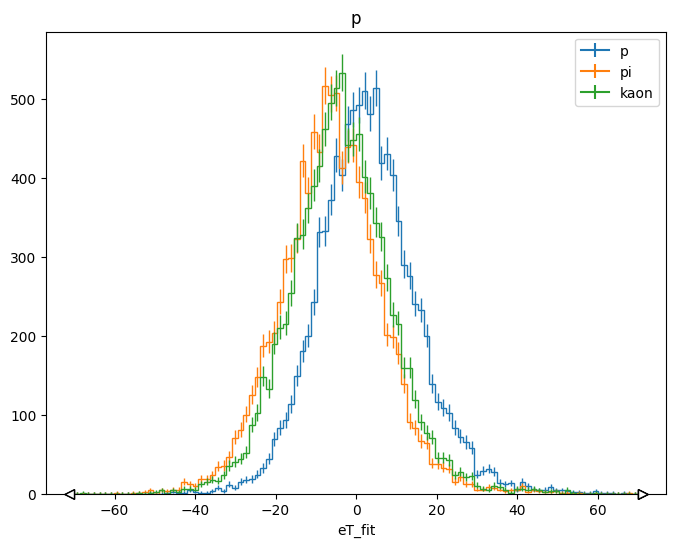

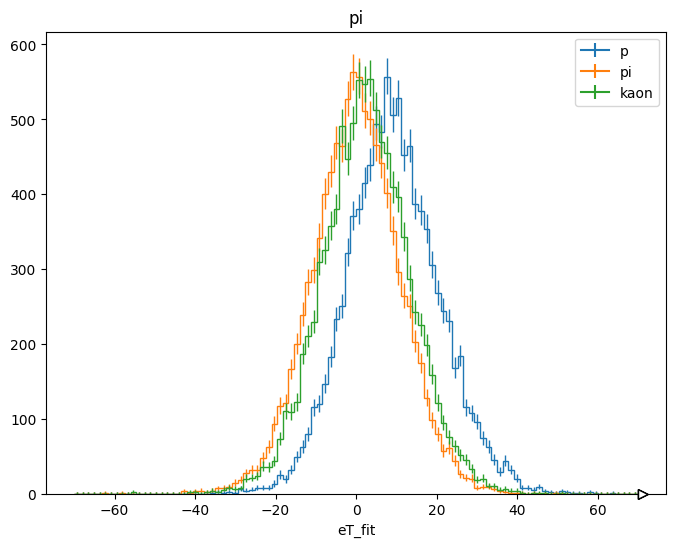

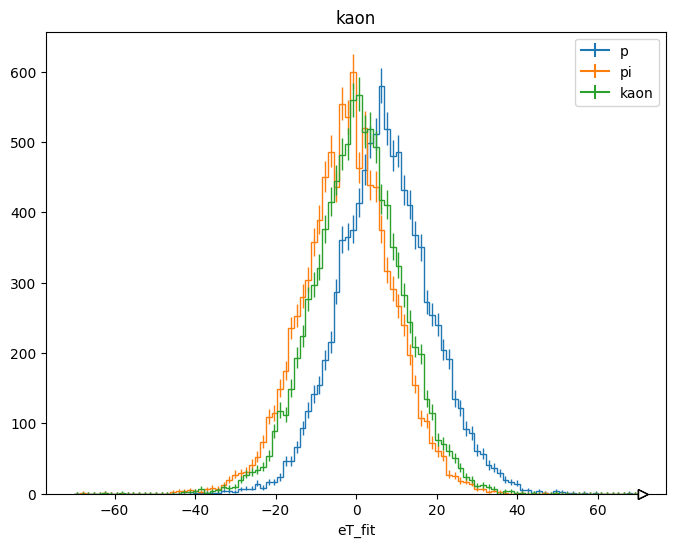

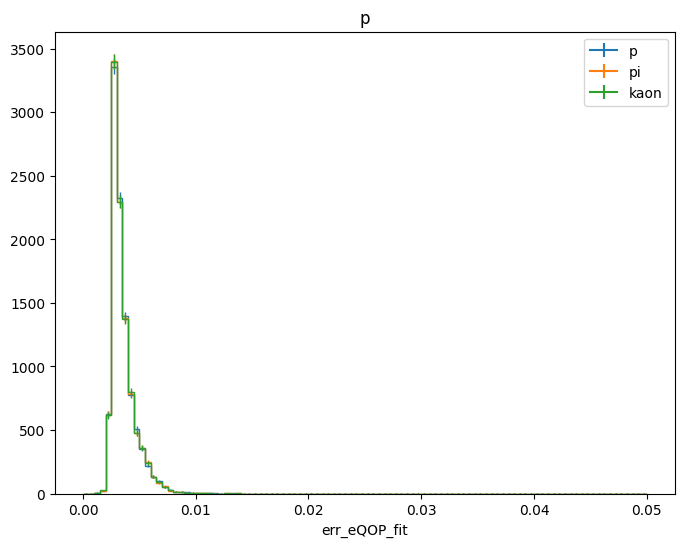

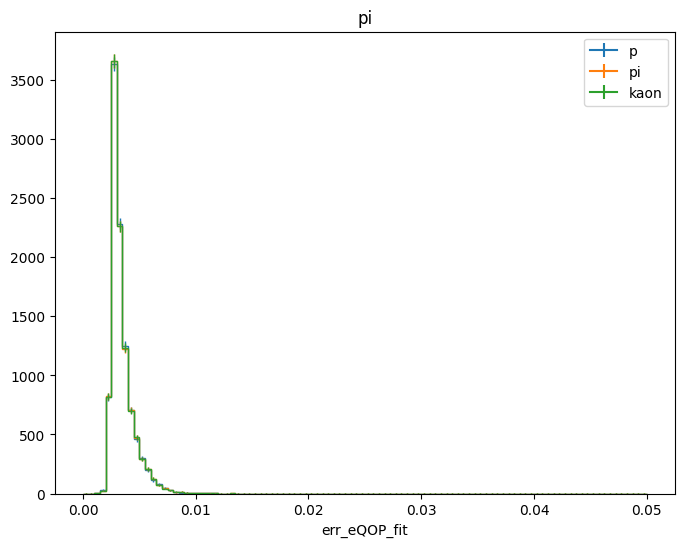

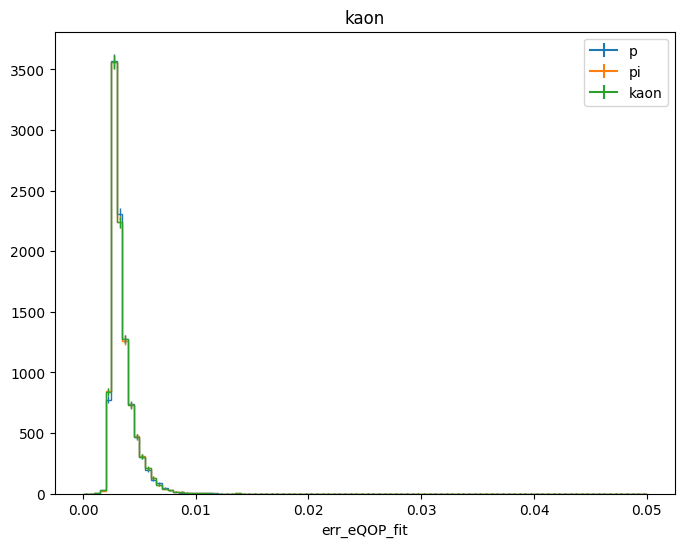

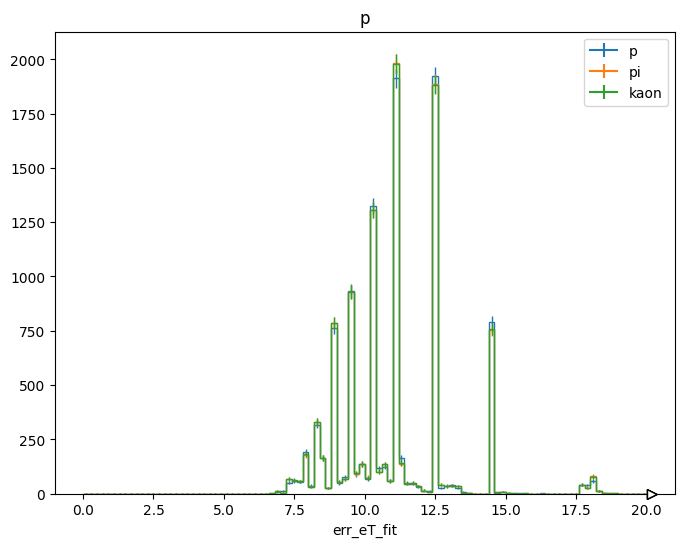

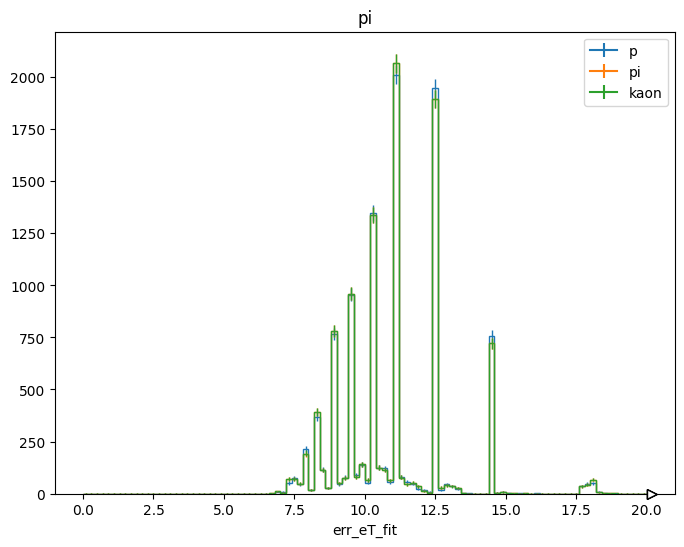

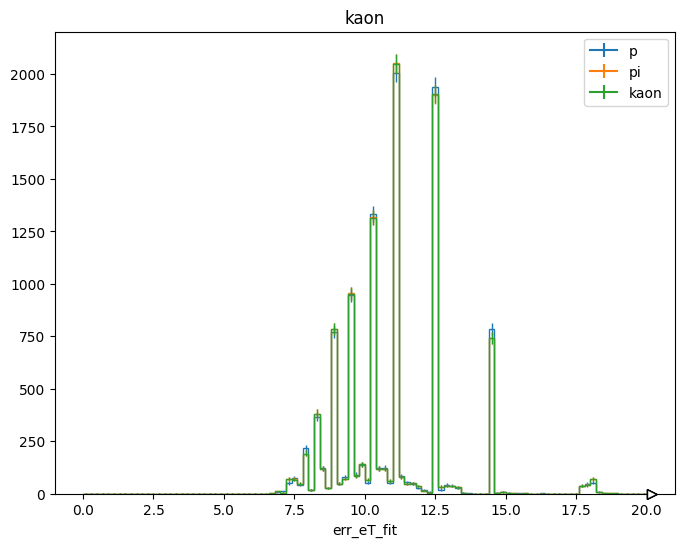

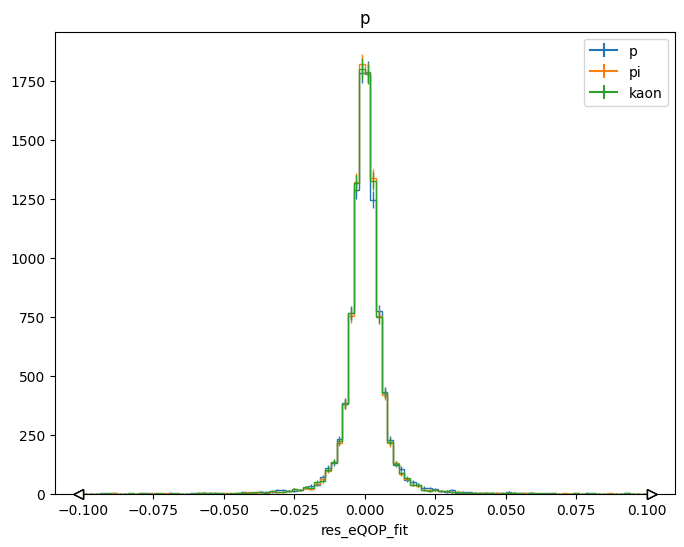

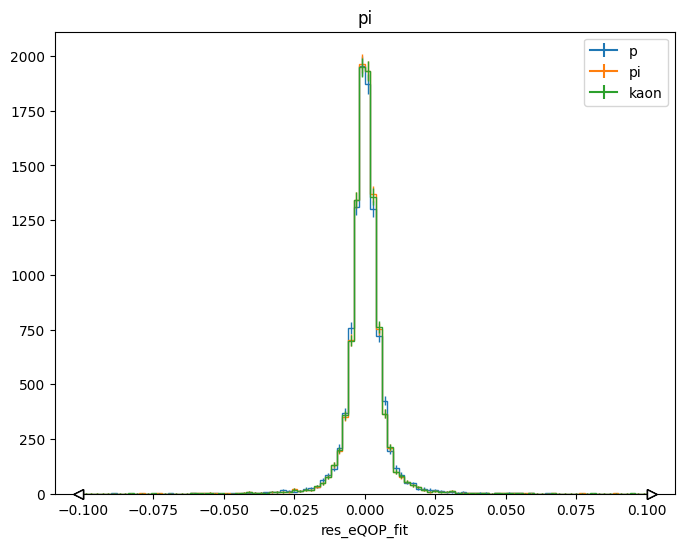

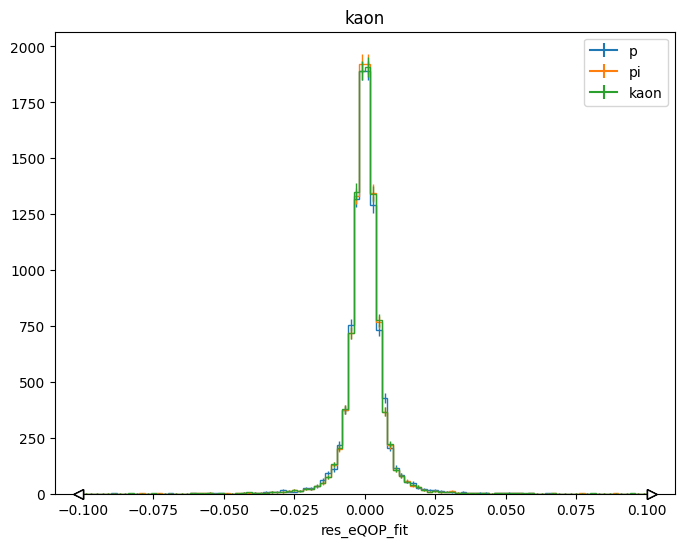

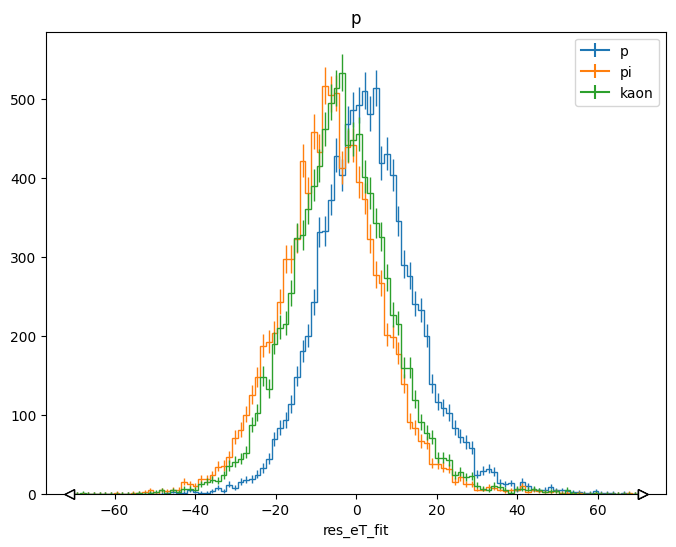

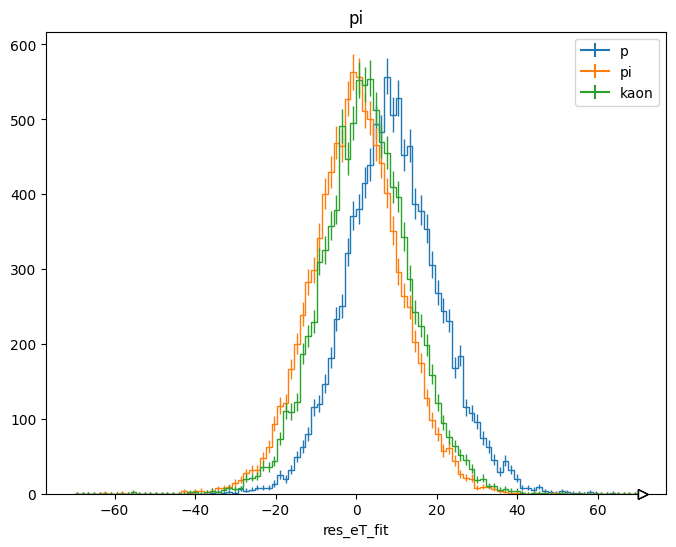

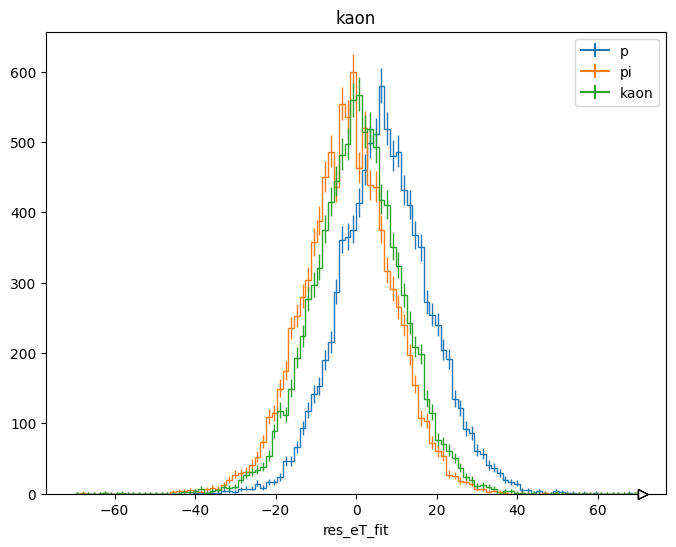

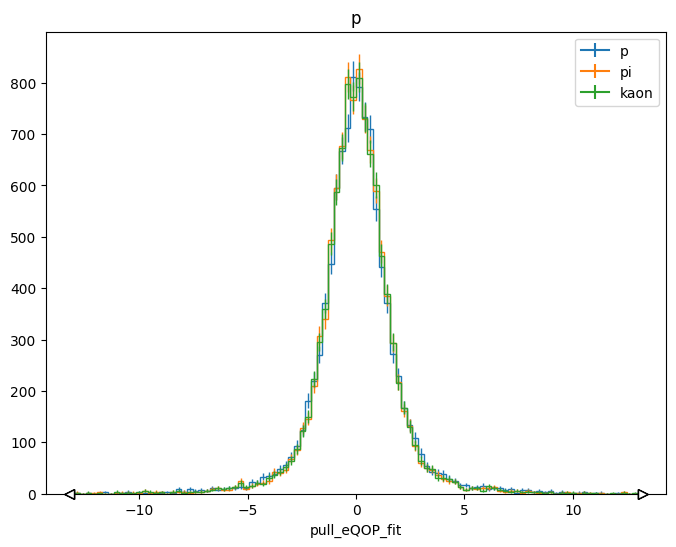

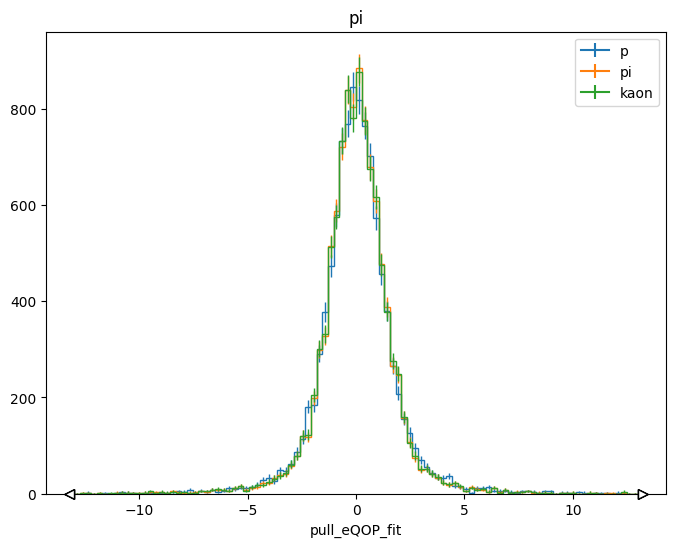

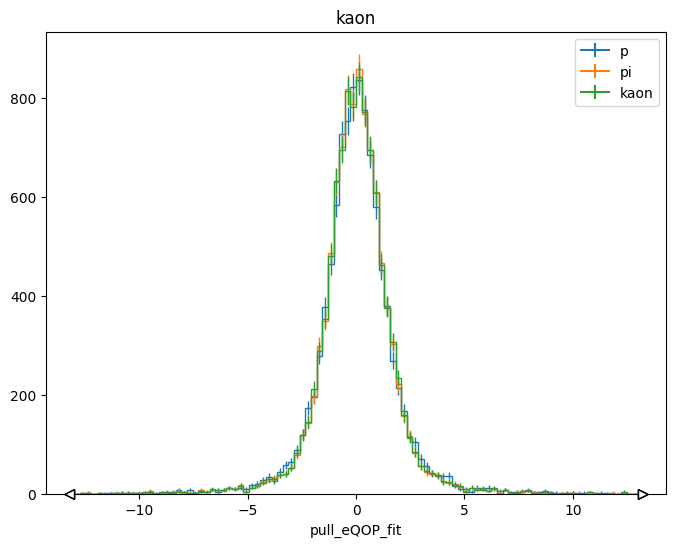

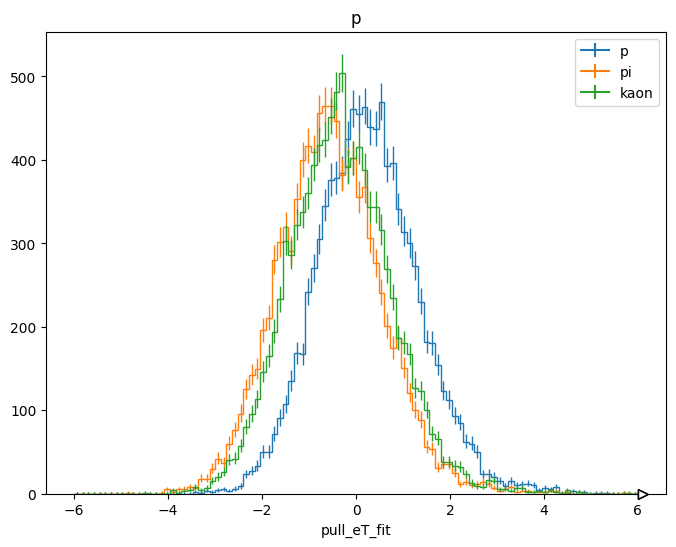

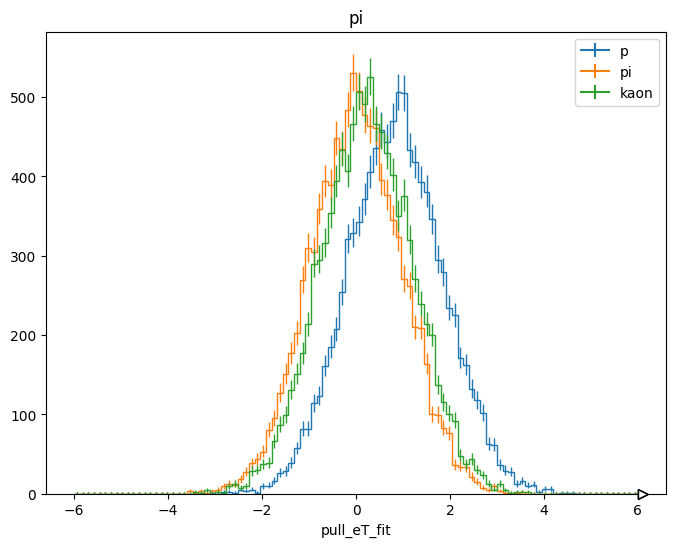

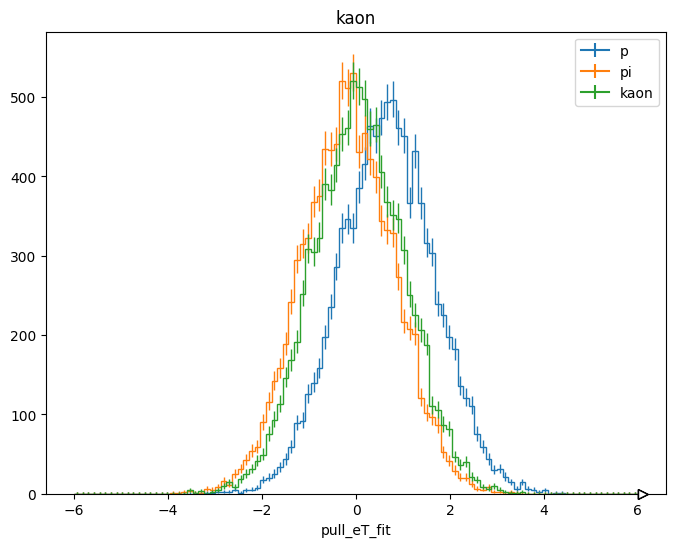

In [ ]:
import hist
from hist import Hist
import numpy as np
import awkward as ak
import matplotlib.pyplot as plt
import uproot
import mplhep


particles = ["p", "pi", "kaon"]
branches = ["chi2Sum", "eQOP_fit", "eT_fit", "err_eQOP_fit", "err_eT_fit", "res_eQOP_fit", "res_eT_fit",
            "pull_eQOP_fit", "pull_eT_fit"
]
xmins = [0, -1, -70, 0, 0, -0.1, -70, -13, -6]
xmaxs = [150, 1, 70, 0.06, 20, 0.1, 70, 13, 6]

ranges = zip(branches, xmins, xmaxs)


def do_assumption(branch, hypo):
    spectrums = dict()

    for truth in particles:
        filename = f"/workspaces/acts/tracksummary_kf_h_{hypo}_t_{truth}.root"
        with uproot.open(filename) as file:
            variable = file["tracksummary"][branch]
            raw = variable.array(library="ak")
            spectrums[truth] = ak.flatten(raw)

    return spectrums


for branch, xmin, xmax in ranges:
    for hypo in particles:
        fig, ax = plt.subplots(figsize=(8, 6))
        specs = do_assumption(branch, hypo)

        for truth in specs:
            container = Hist(hist.axis.Regular(100, xmin, xmax, name = branch))
            container.fill(**{branch:specs[truth]})
            container.plot1d(ax=ax, lw=1, label=truth)

        ax.legend()
        ax.set_title(hypo)
        fig.savefig(f"pics hypo/{branch}_h_{hypo}")
        plt.show()


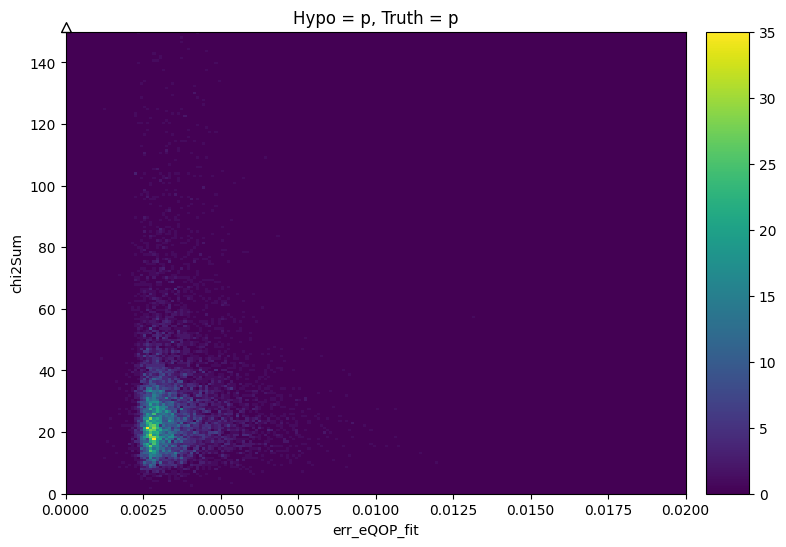

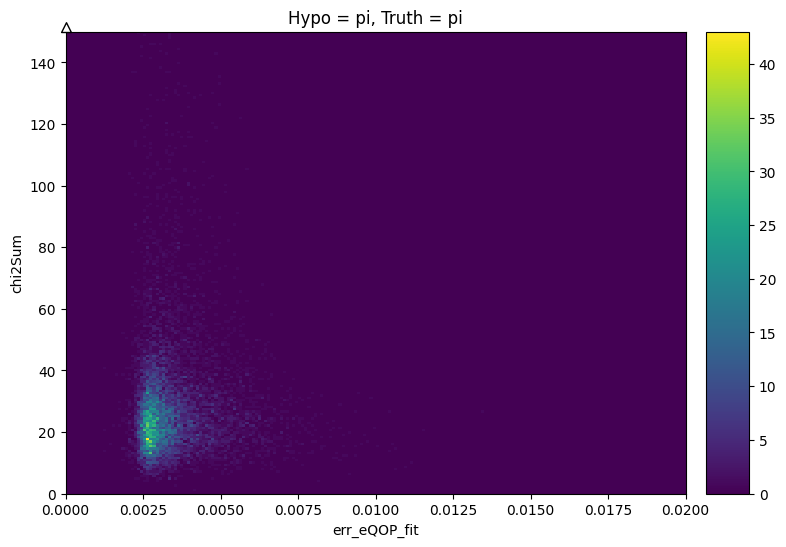

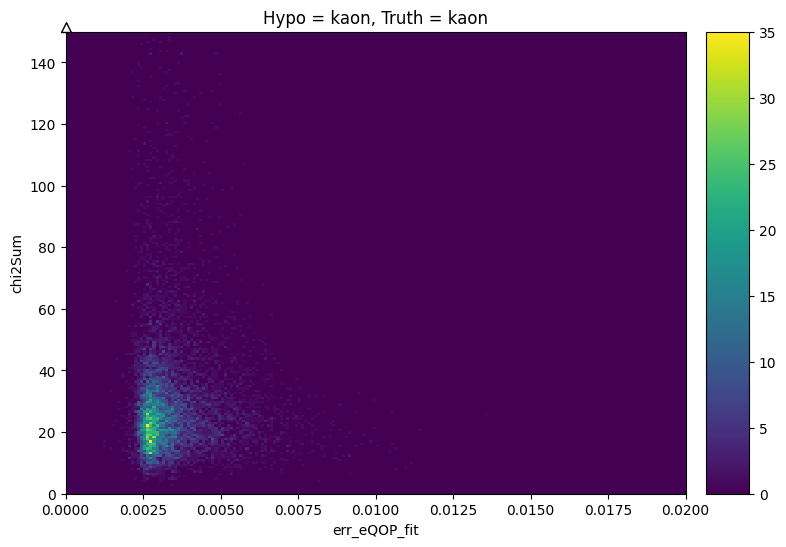

In [24]:
particles = ["p", "pi", "kaon"]
branches = ["chi2Sum", "eQOP_fit", "eT_fit", "err_eQOP_fit", "err_eT_fit", "res_eQOP_fit", "res_eT_fit"
]
xmins = [0, -1, -70, 0, 0, -0.1, -70]
xmaxs = [150, 1, 70, 0.02, 20, 0.1, 70]

ranges = list(zip(branches, xmins, xmaxs))

chi2 = ranges[0]
err_qop = ranges[3]

for ptcl in particles:
    fig, ax = plt.subplots(figsize=(8, 6))
    filename = f"/workspaces/acts/tracksummary_kf_h_{ptcl}_t_{ptcl}.root"
    with uproot.open(filename) as file:
        qop = file["tracksummary"][err_qop[0]]
        chi = file["tracksummary"][chi2[0]]

        hist2d = hist.Hist(
            hist.axis.Regular(200, err_qop[1], err_qop[2], name = err_qop[0]),
            hist.axis.Regular(200, chi2[1], chi2[2], name=chi2[0])
        )

        hist_qop = ak.flatten(qop.array(library="ak"))
        hist_chi = ak.flatten(chi.array(library="ak"))

        hist2d.fill(hist_qop, hist_chi)
        hist2d.plot2d(ax=ax)
        ax.set_title(f"Hypo = {ptcl}, Truth = {ptcl}")
        fig.savefig(f"chi2 vs eqop/h_{ptcl}_t_{ptcl}.png")

    